In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv("data/train.csv", index_col="Id")
test = pd.read_csv("data/test.csv", index_col="Id")
full = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']])

In [3]:
full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Split features:
1. quantitative
2. qualitative
3. skewed

In [5]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
skewed_features = [f for f in quantitative if skew(train[f]) > .75]

### Identify Missing Values

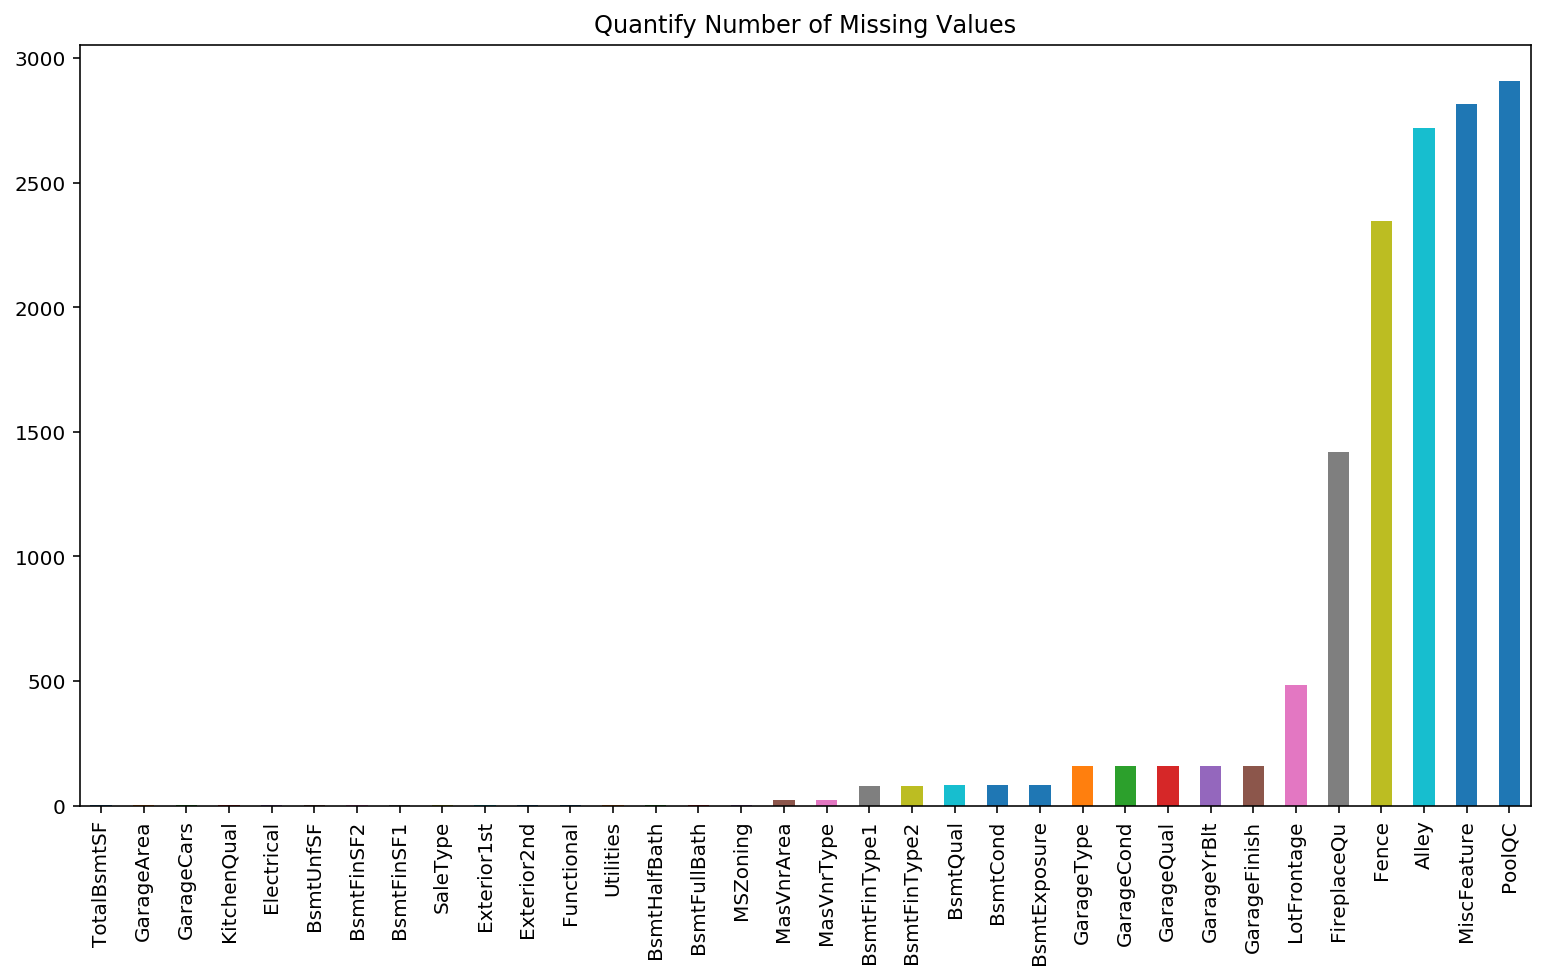

In [6]:
missing = full.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(title="Quantify Number of Missing Values", figsize=(13,7))

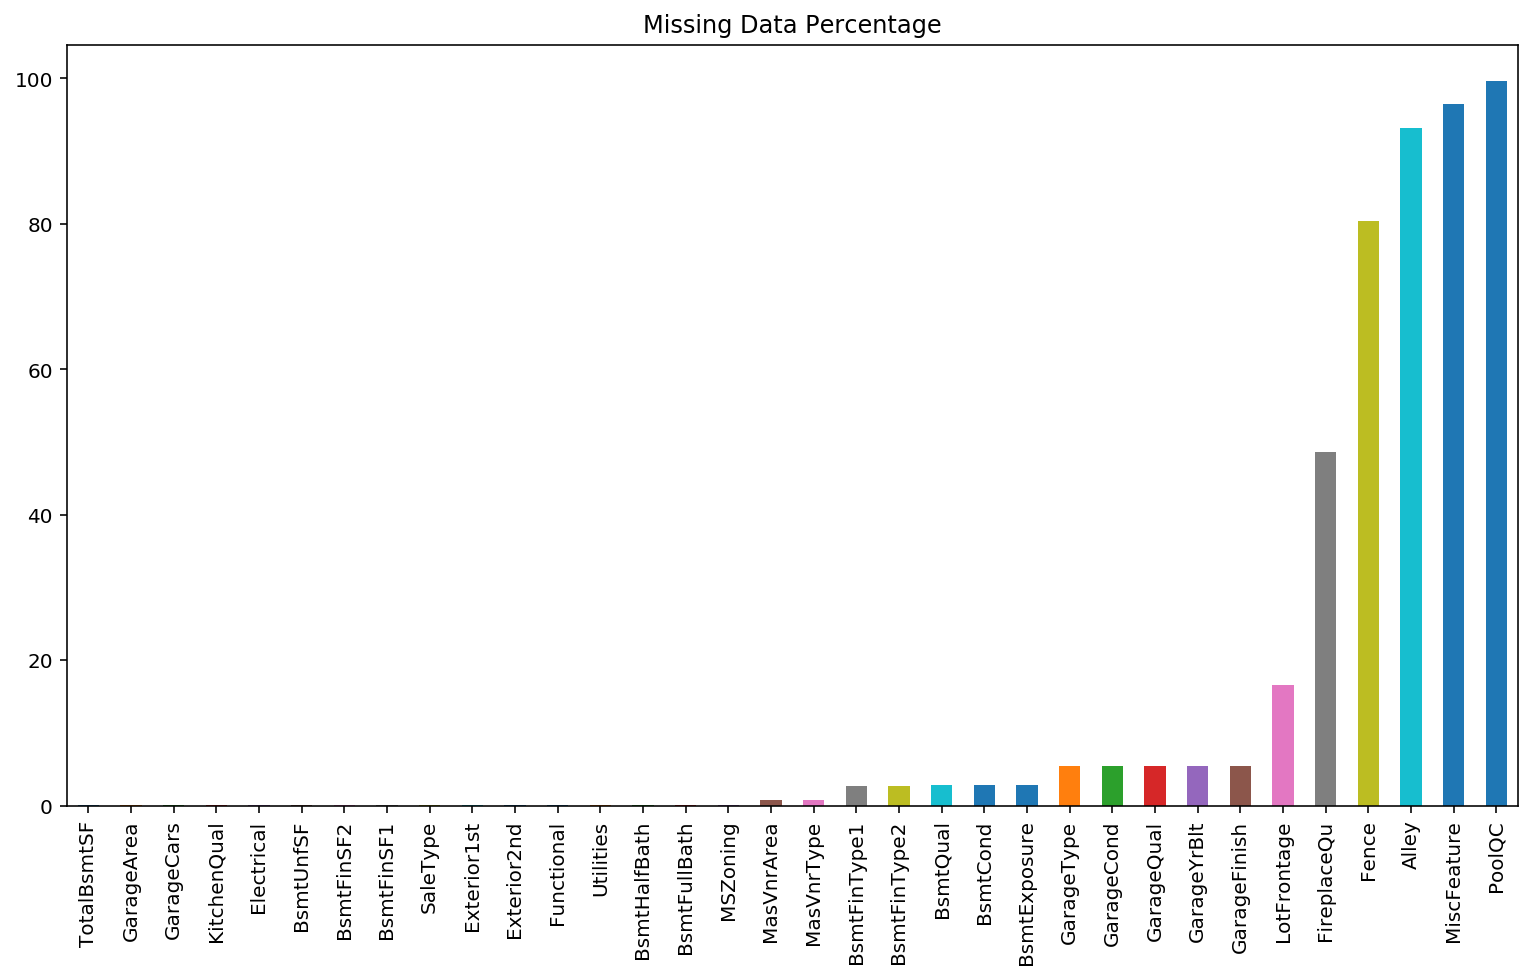

In [7]:
missing = (full.isnull().sum()/full.isnull().count()) * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(title="Missing Data Percentage", figsize=(13,7))

### Remove missing features from the data set

In [8]:
qualitative.remove('PoolQC')
qualitative.remove('MiscFeature')
qualitative.remove('Alley')
qualitative.remove('Fence')
qualitative.remove('FireplaceQu')

### Let's visually analyze few variables in correlation to housing prices

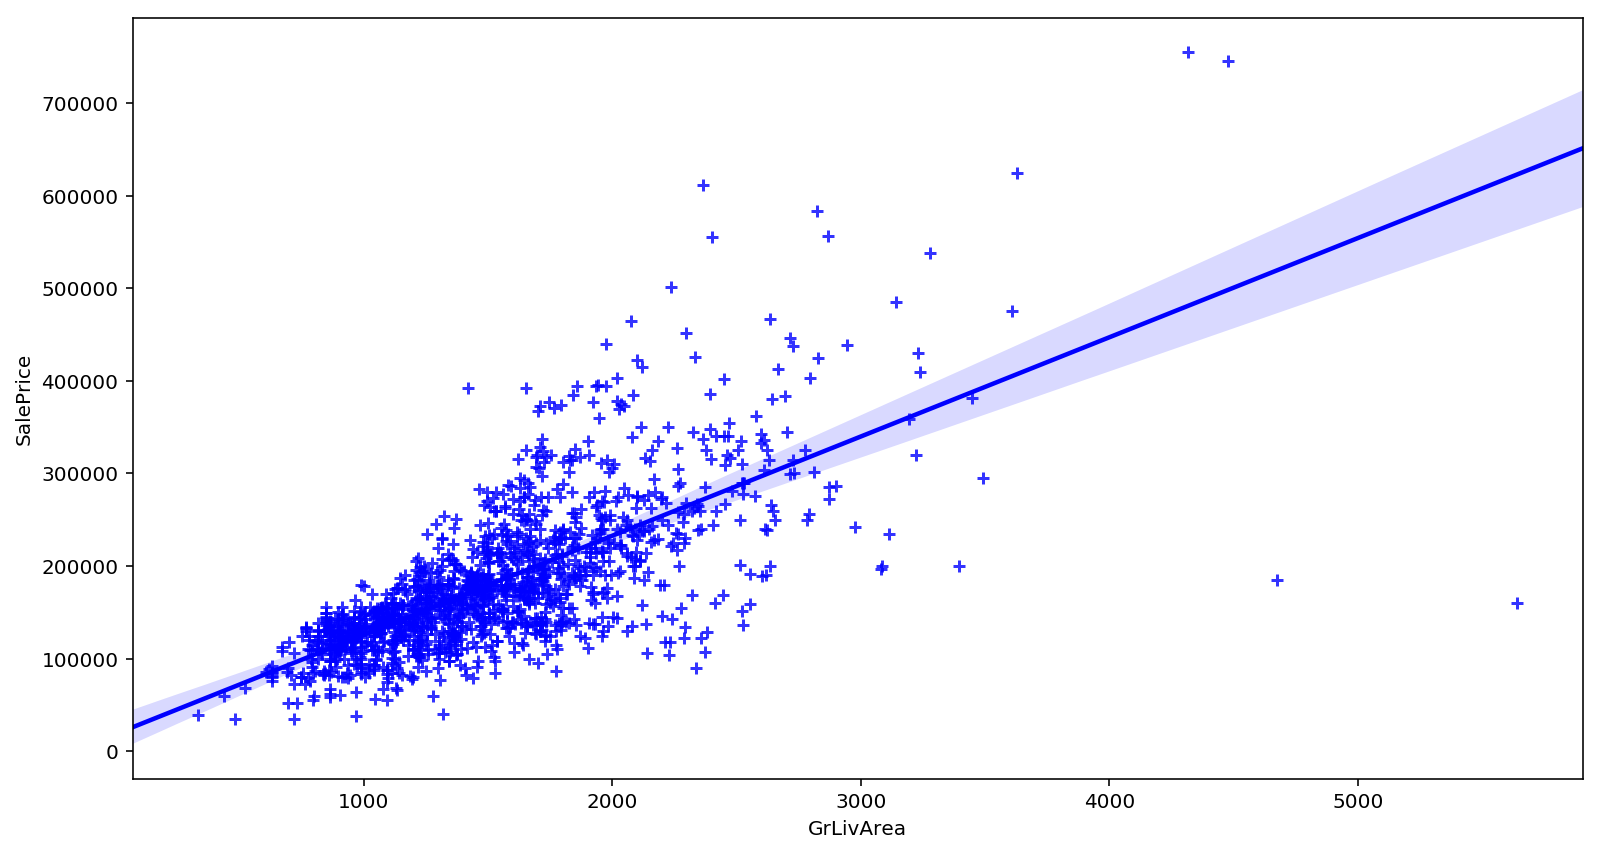

In [9]:
plt.figure(figsize=(13,7))
sns.regplot(x='GrLivArea', y='SalePrice', data=train, marker='+', color='blue')

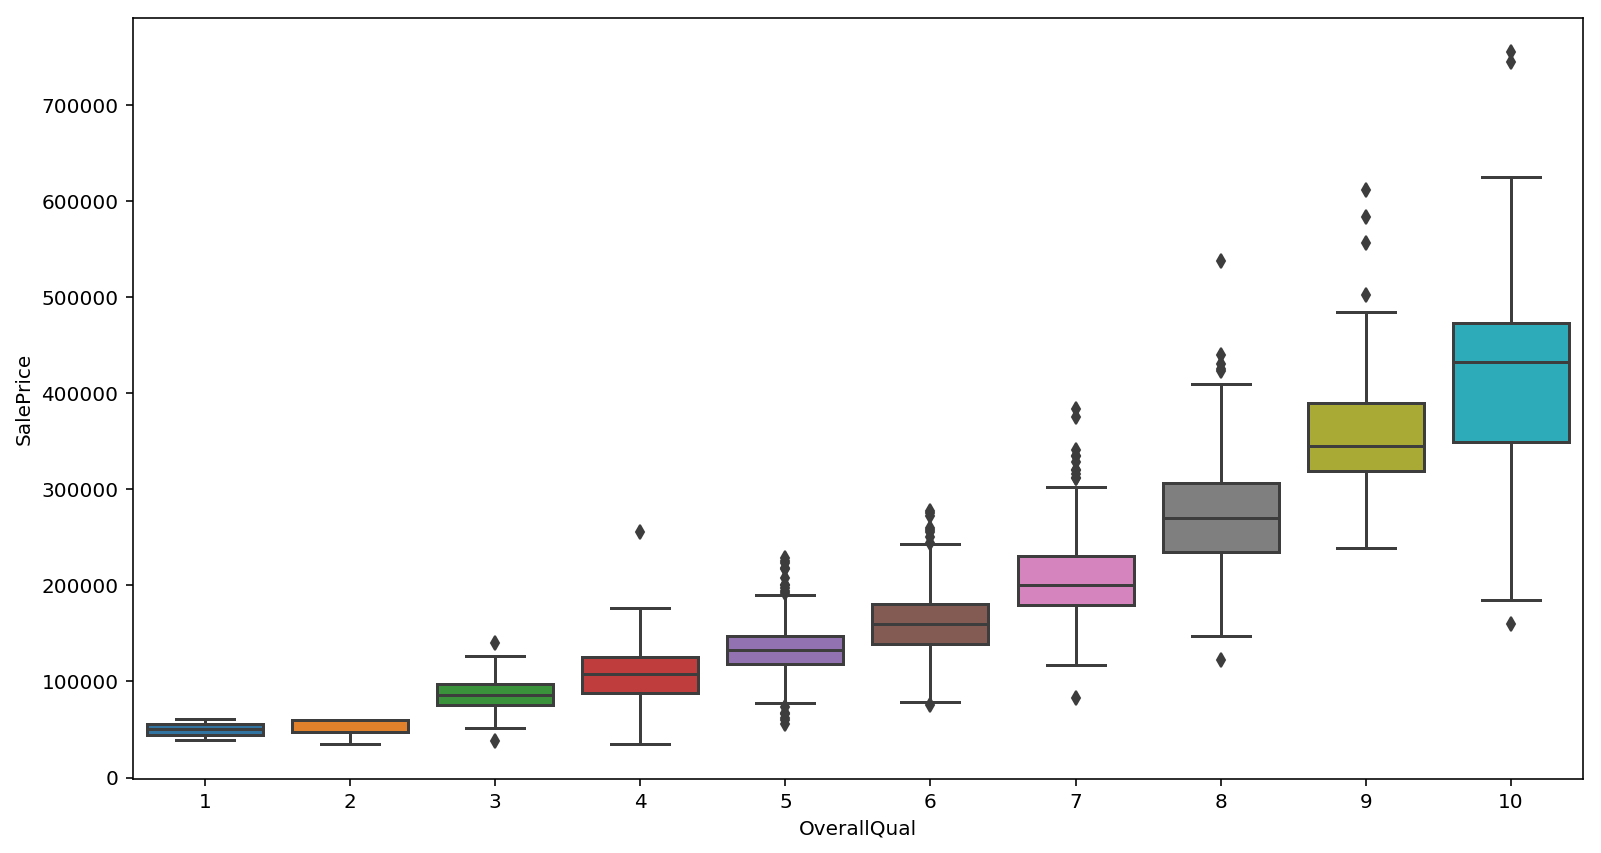

In [10]:
plt.figure(figsize=(13,7))
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

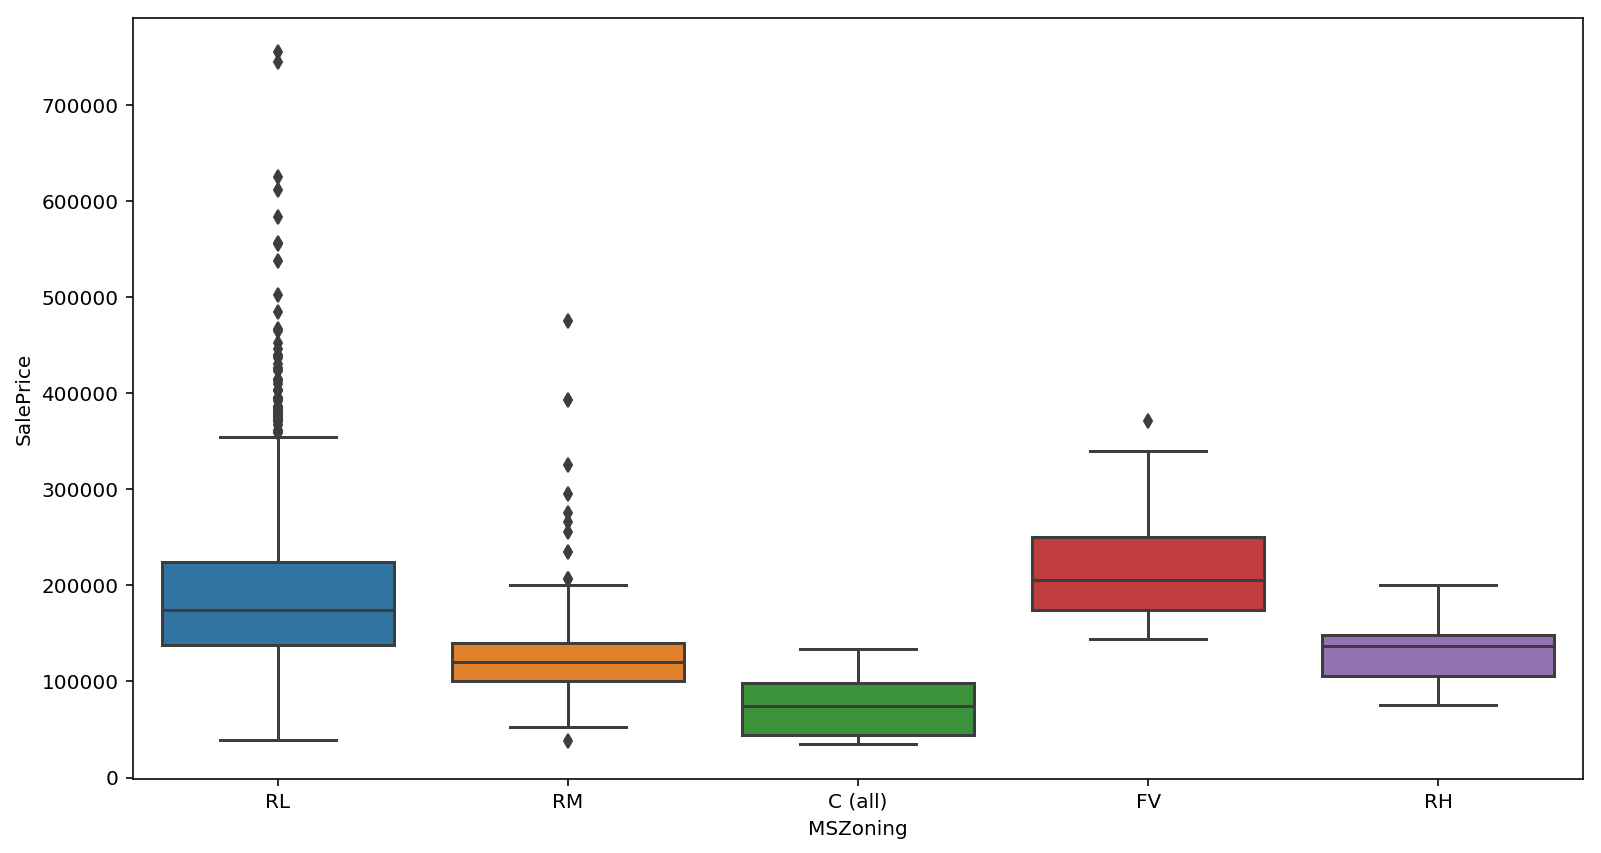

In [11]:
plt.figure(figsize=(13,7))
sns.boxplot(x="MSZoning", y="SalePrice", data=train)

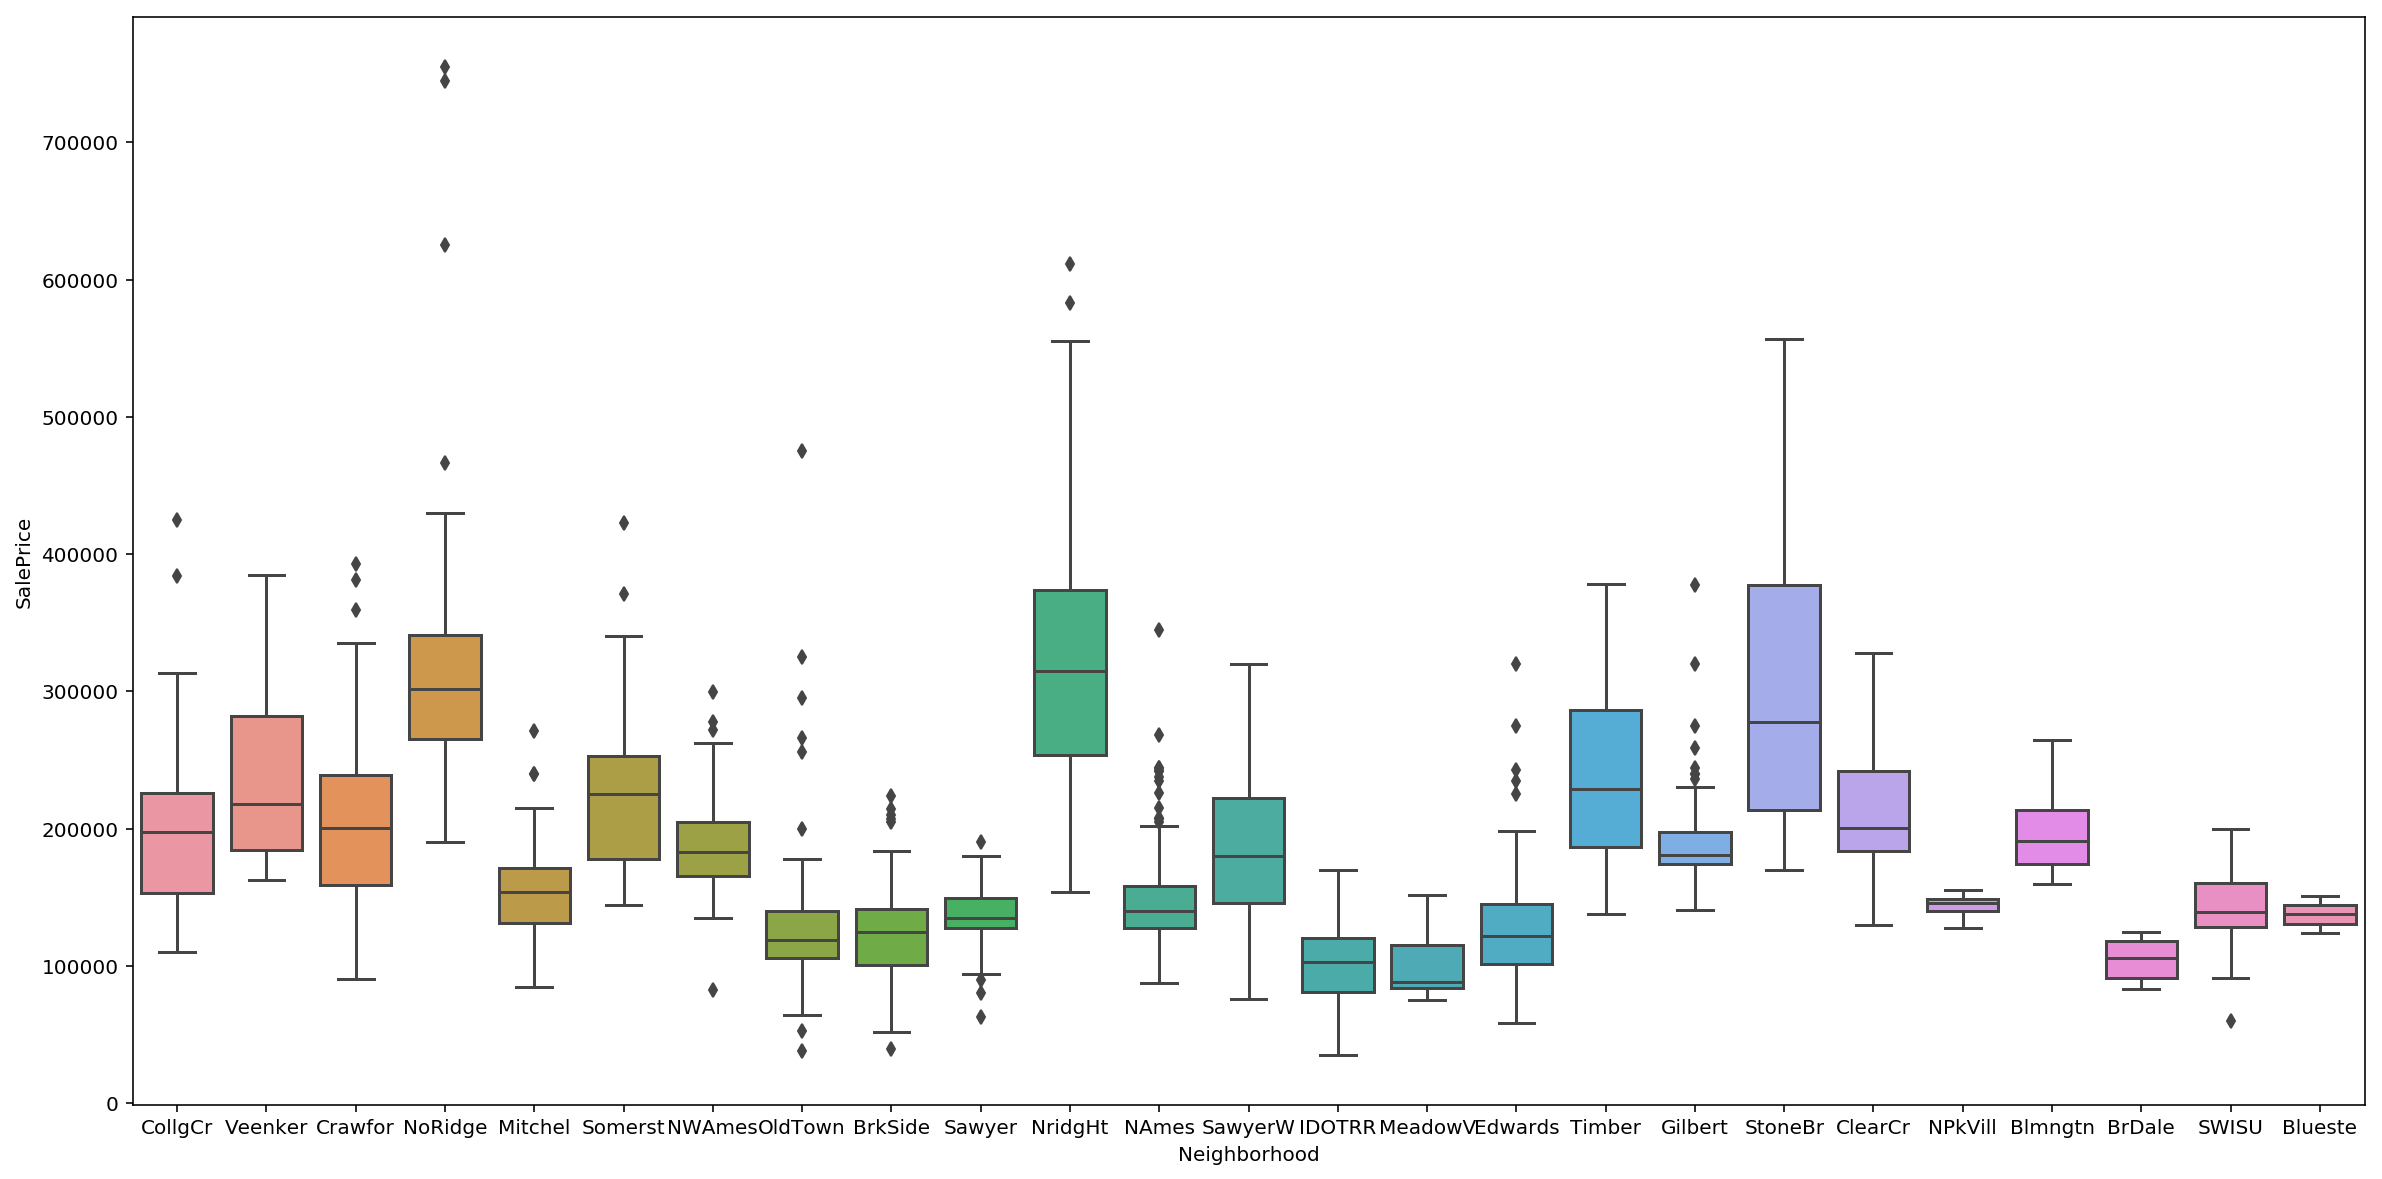

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train)

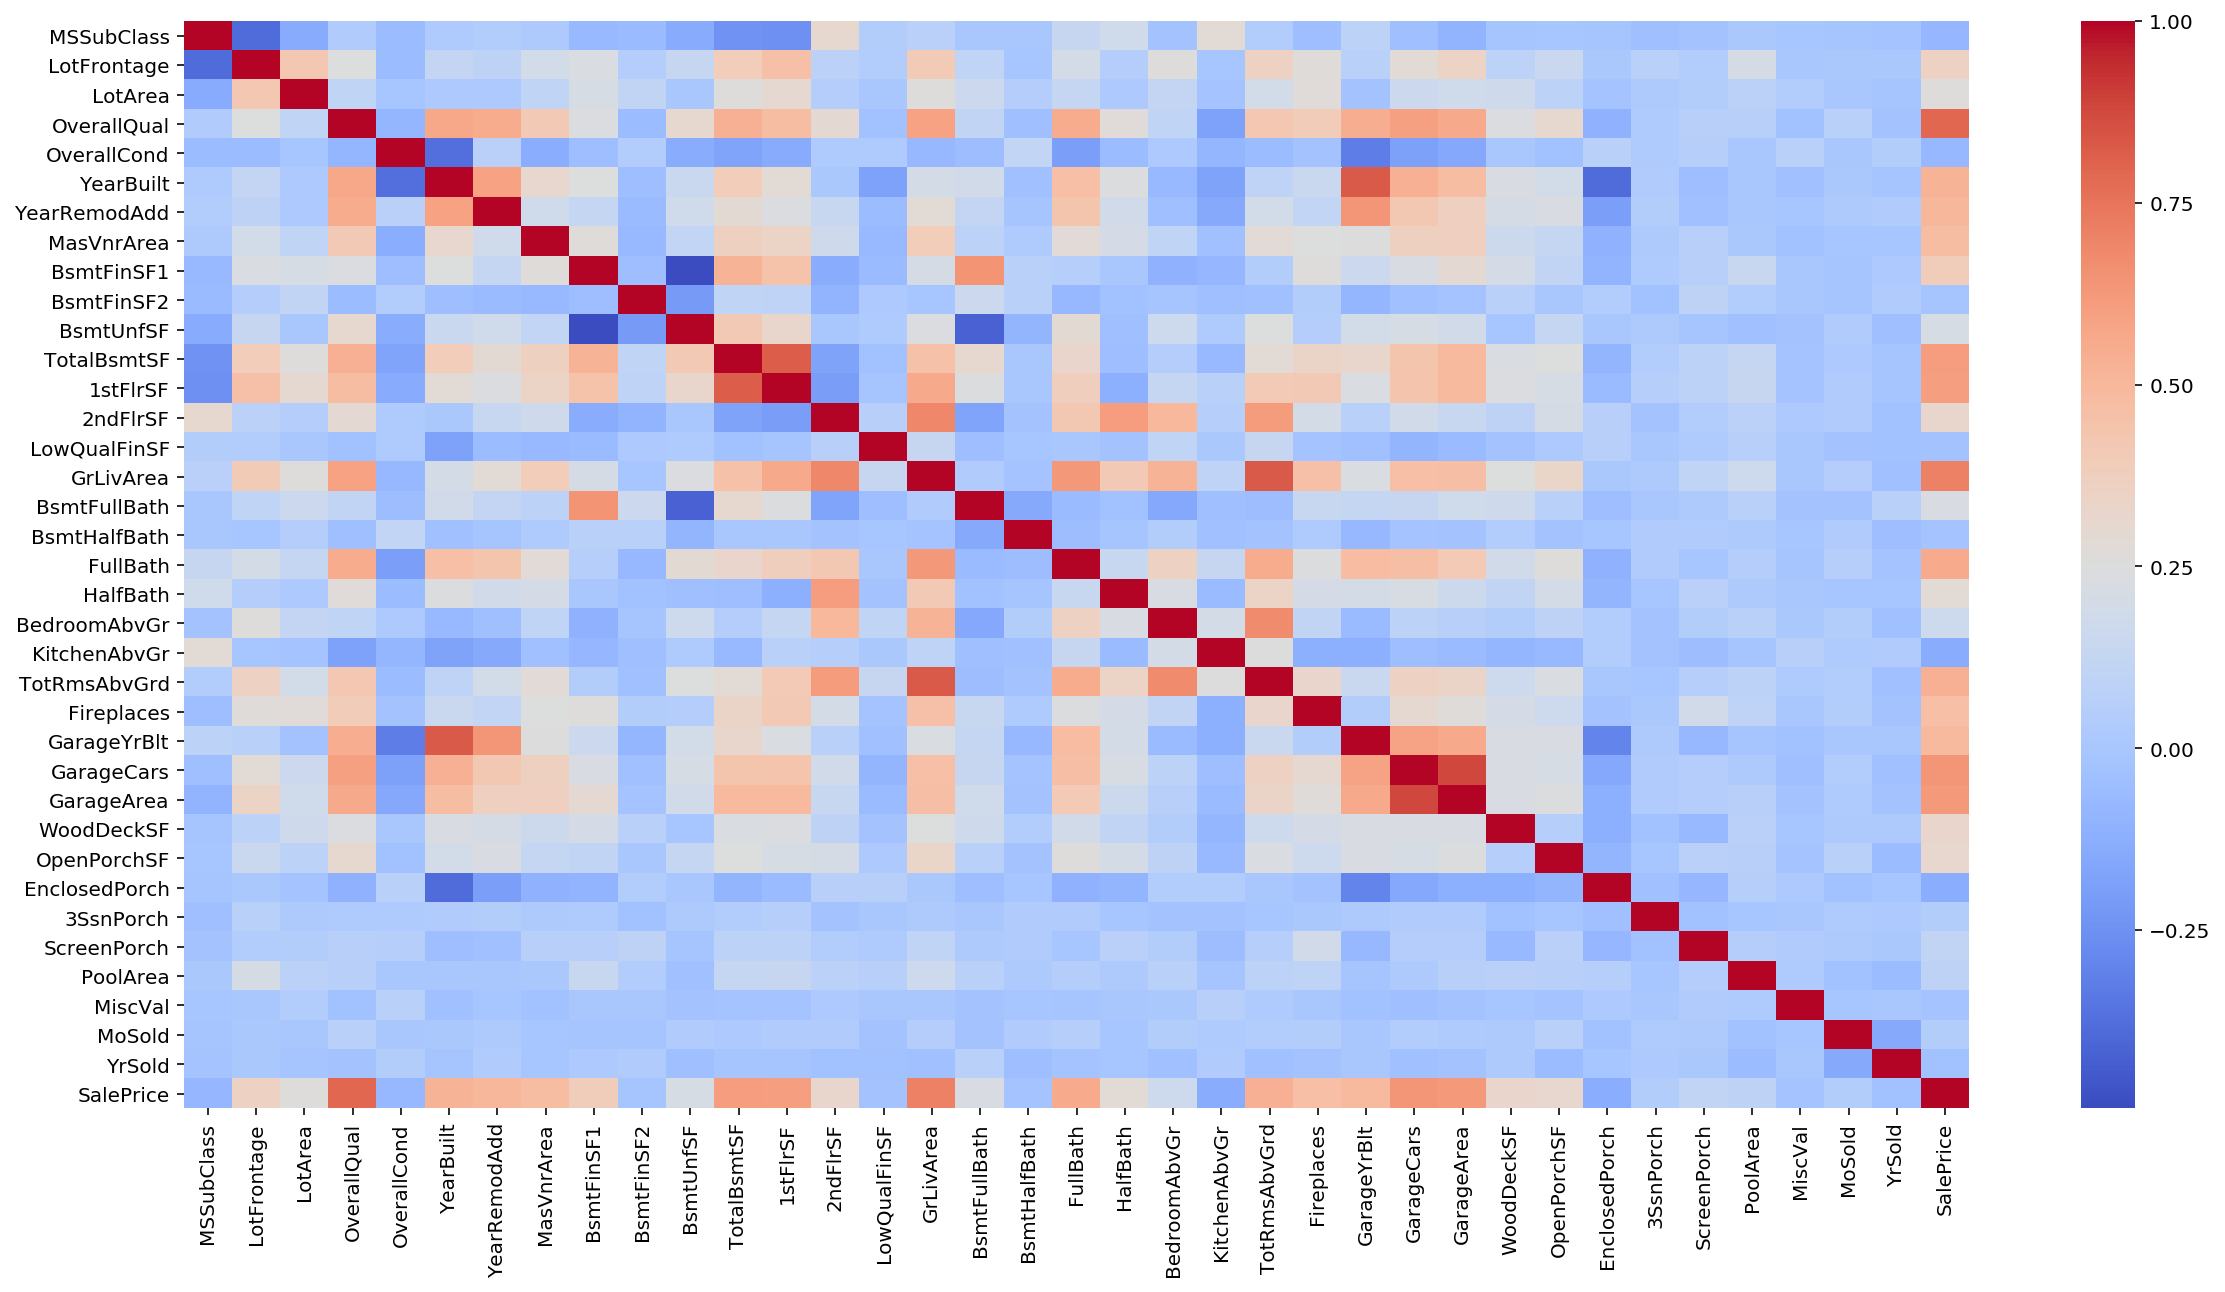

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='coolwarm')

### Let's zoom into the top 20 correlated features

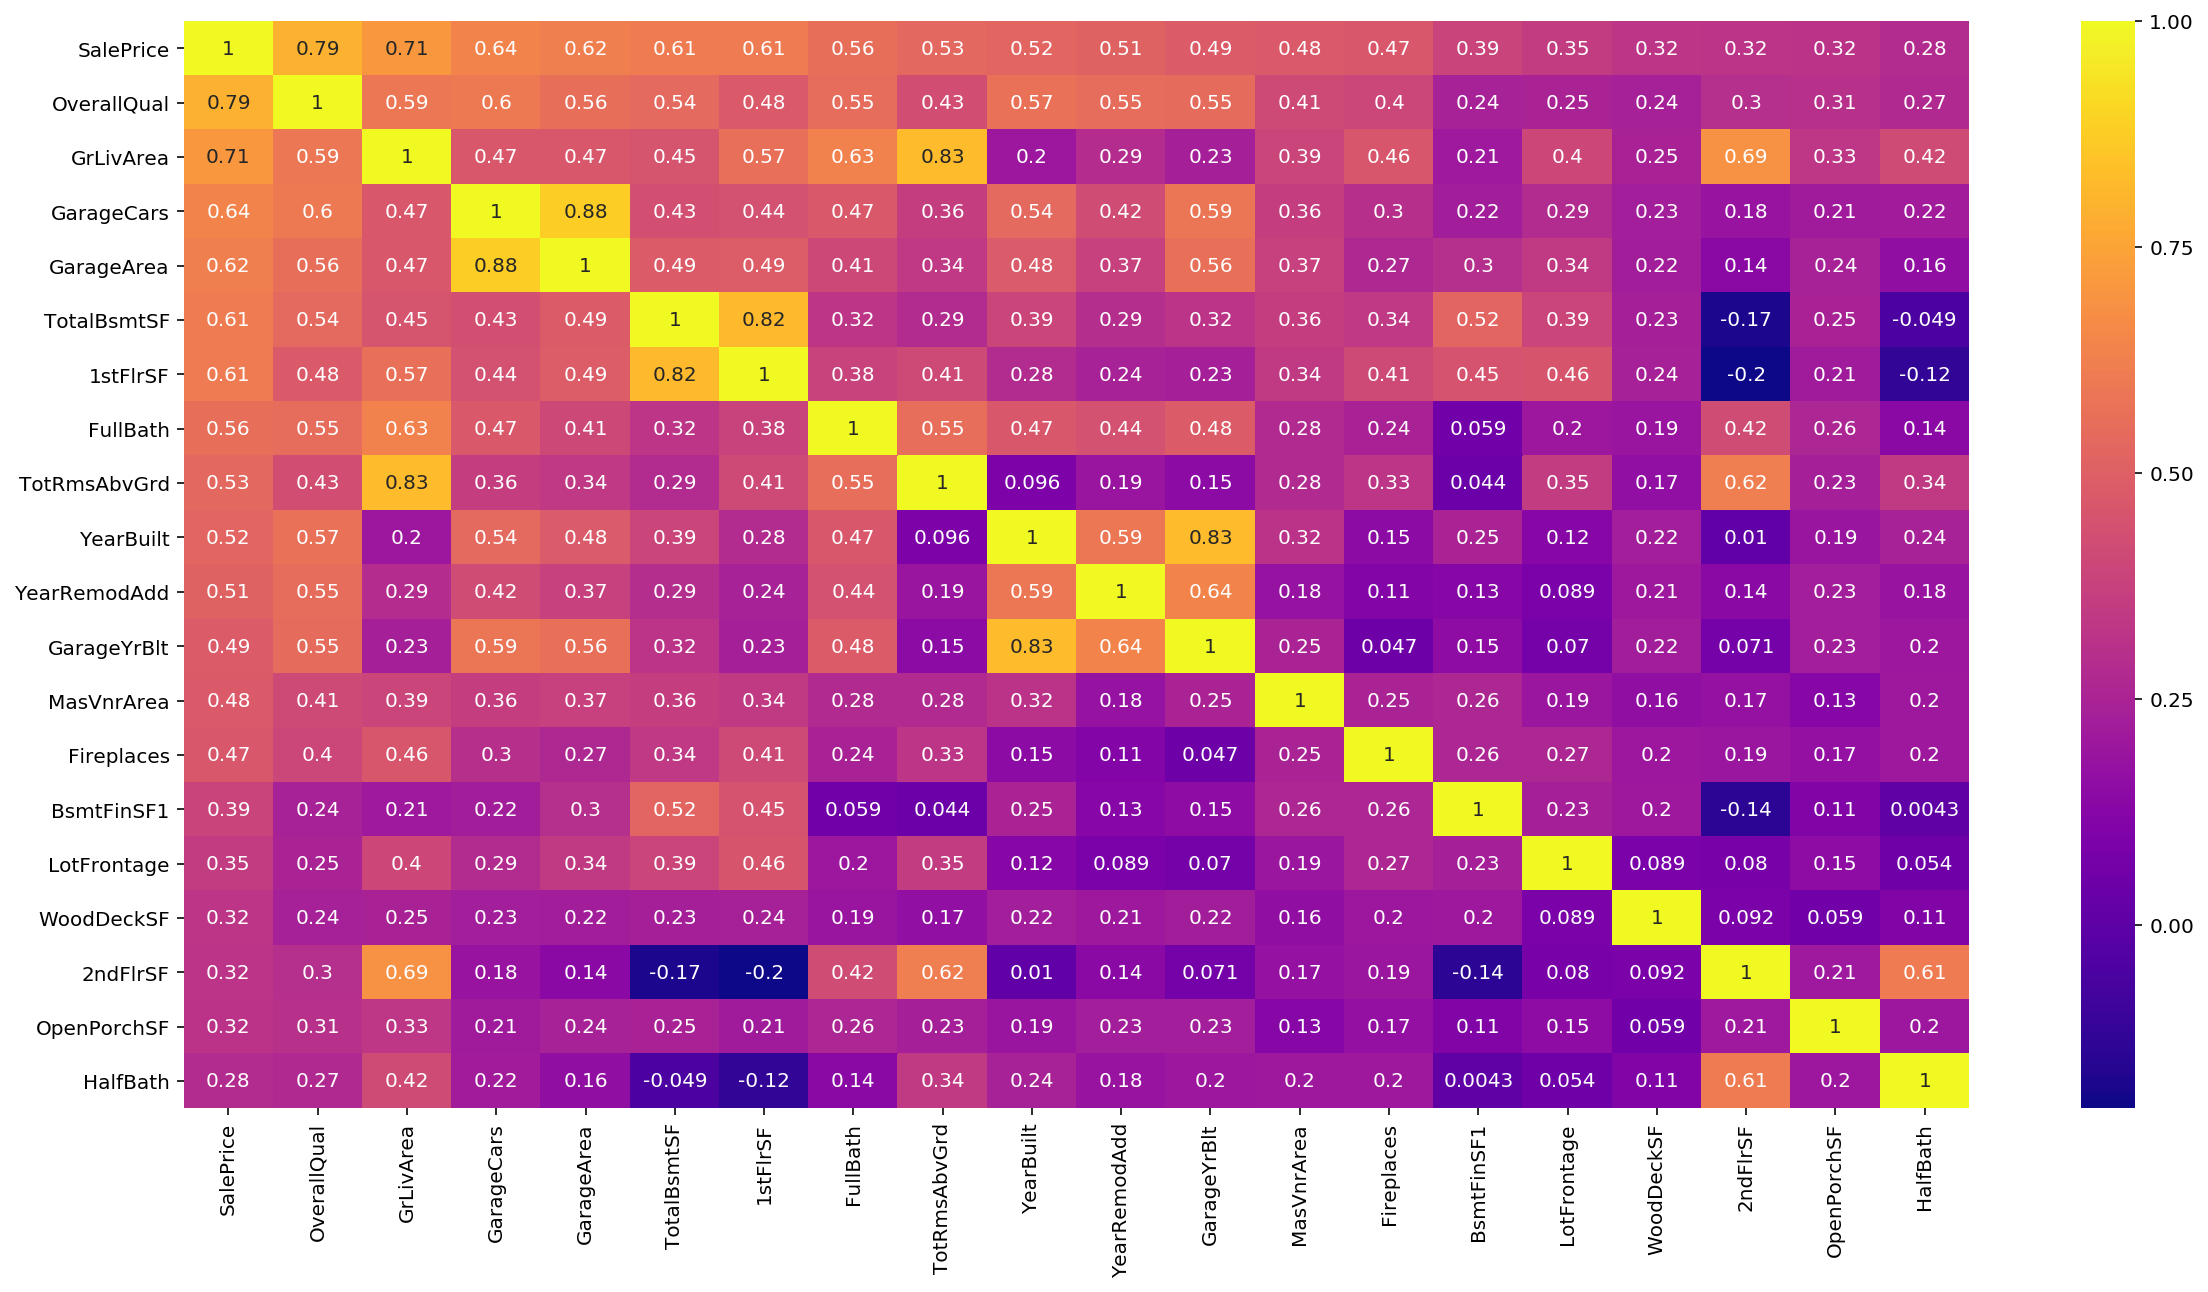

In [14]:
plt.figure(figsize=(20,10))
cols=train.corr().nlargest(20, 'SalePrice').index
sns.heatmap(train[cols].corr(), annot=True,cmap='plasma')

### Let's perform pairplot of top 5 correlated features with SalePrice

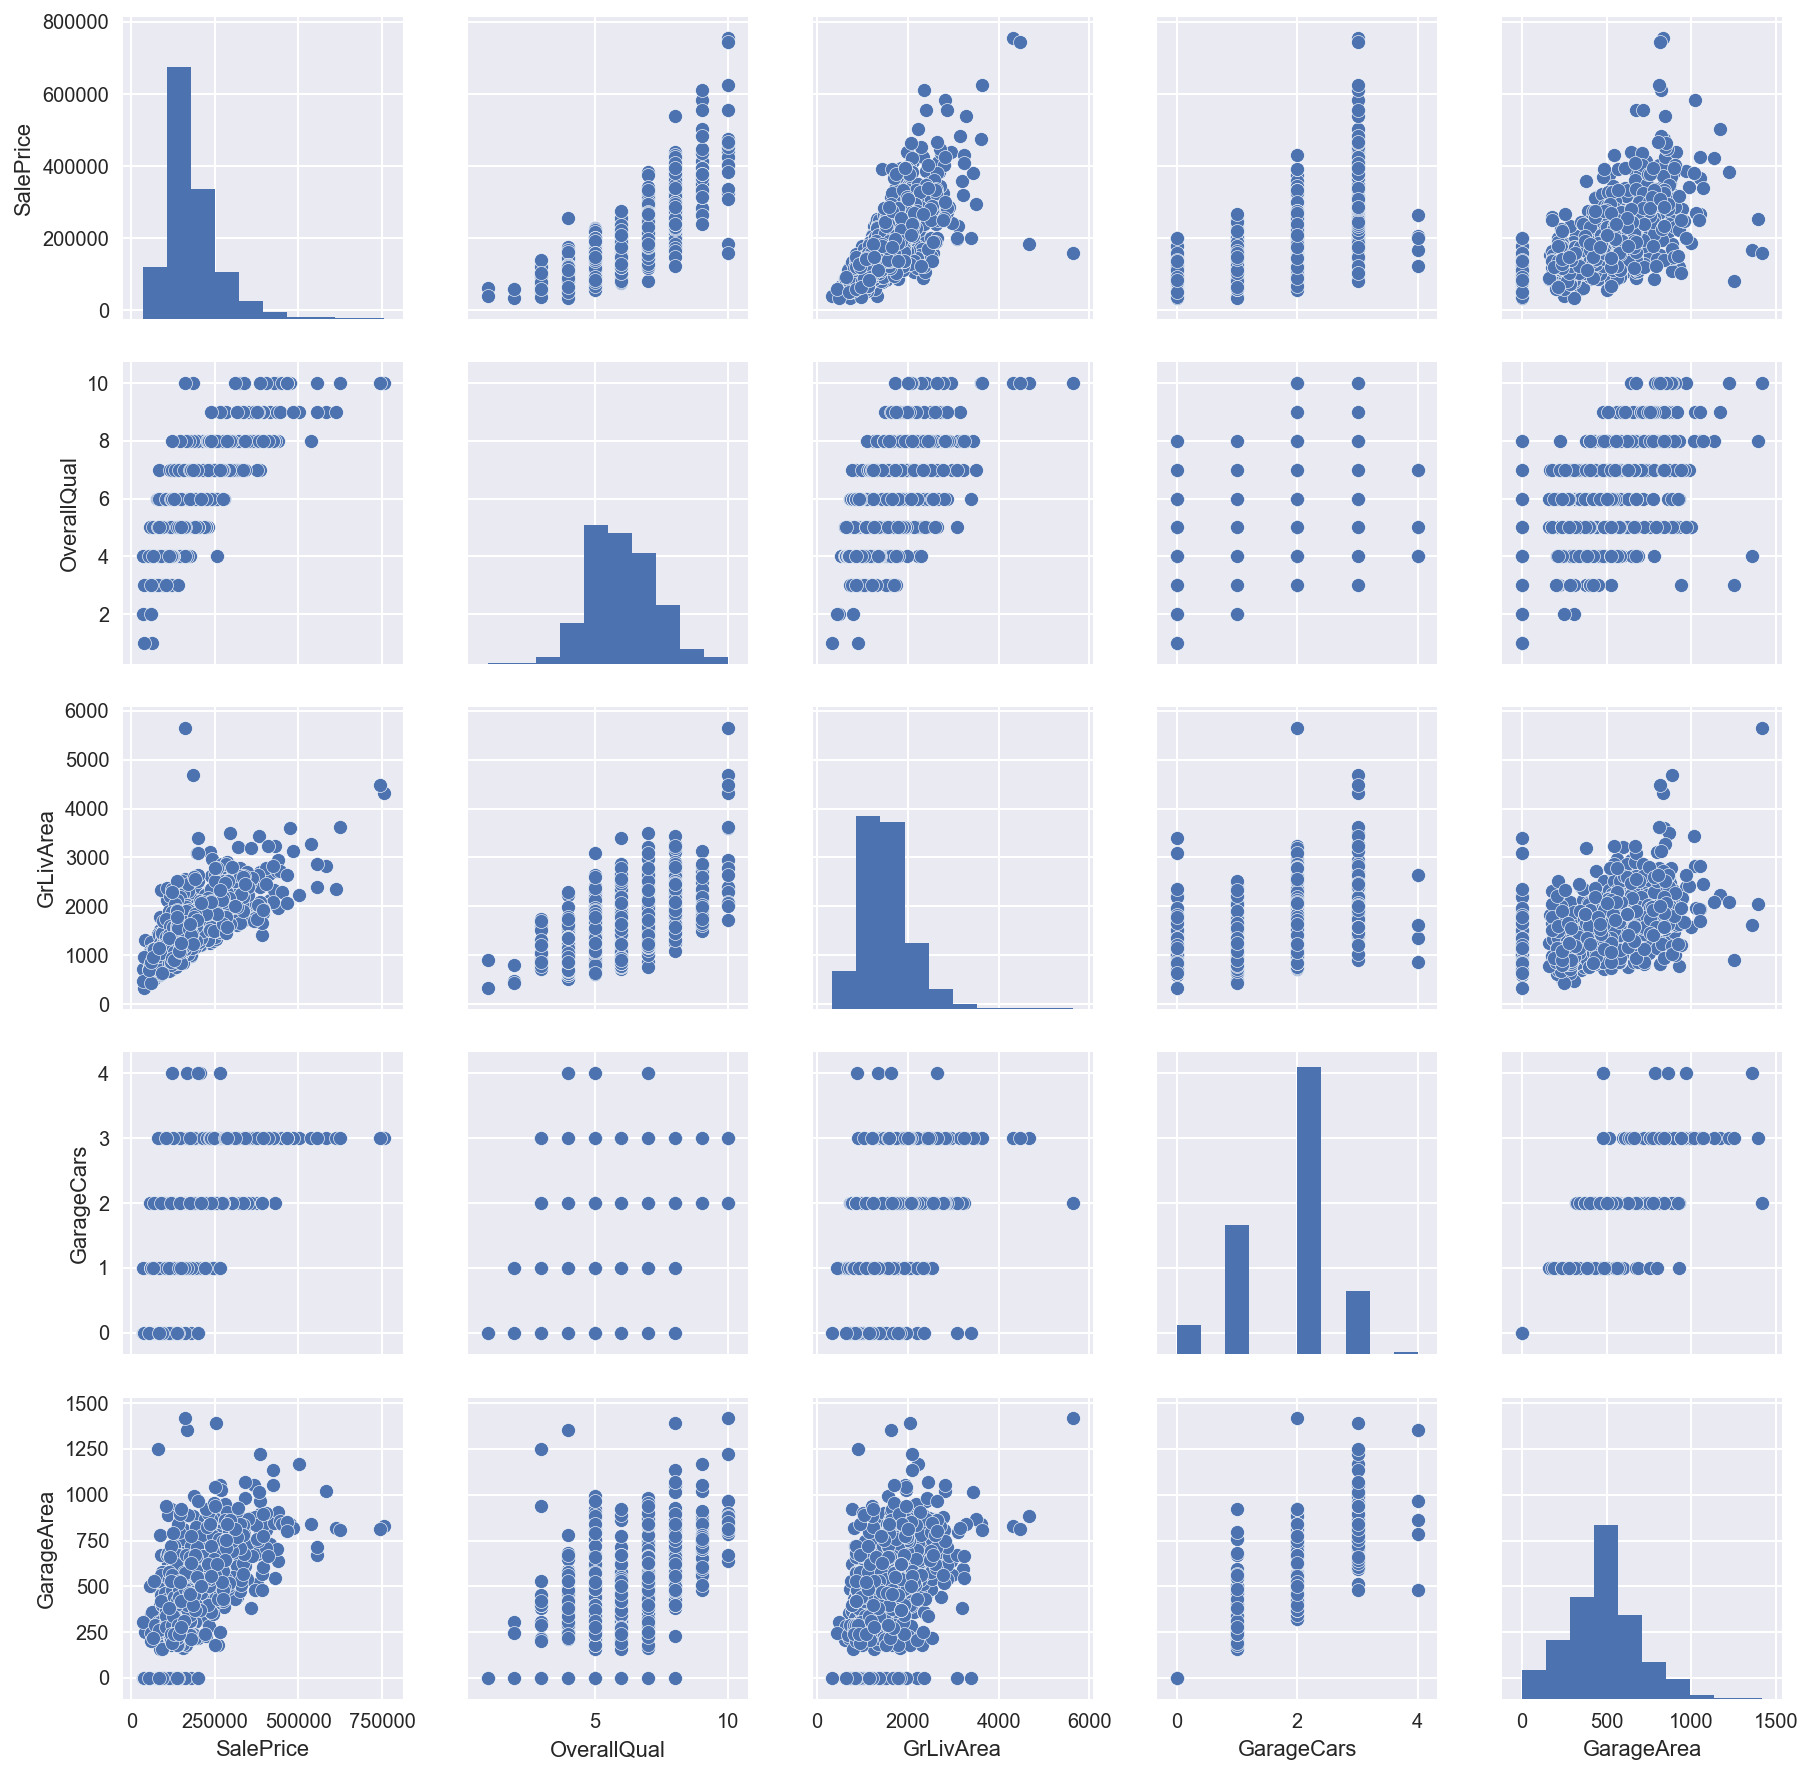

In [15]:
top = 5
cols=train.corr().nlargest(top, 'SalePrice').index
sns.set()
sns.pairplot(train[cols])
plt.show()

### Let's visualize skewed features

In [16]:
skew(train['SalePrice'])

1.880940746034036

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117f74e48>,
      dtype=object)

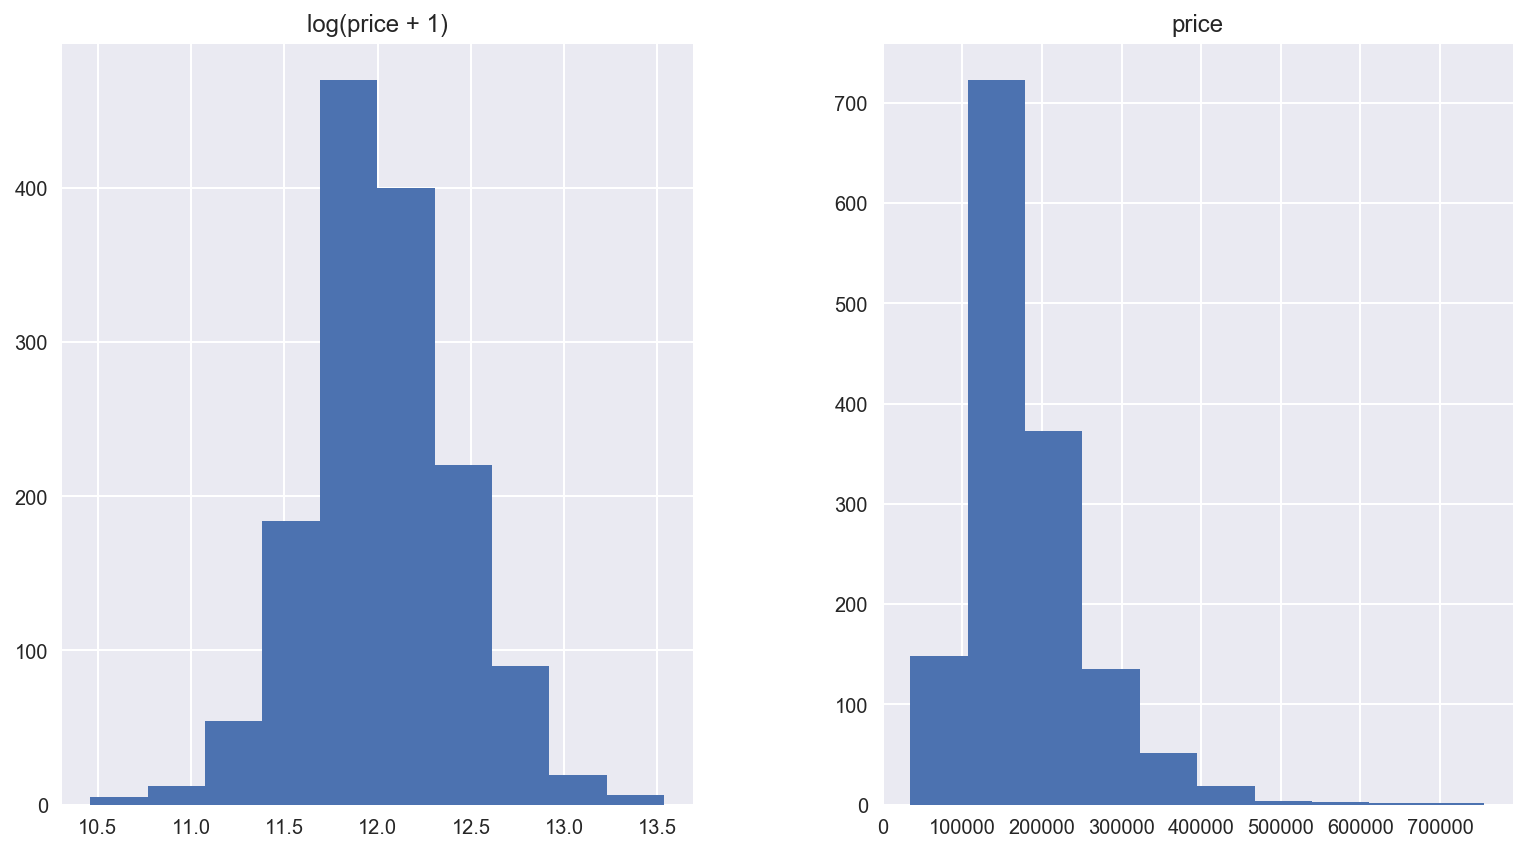

In [17]:
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist(figsize=(13,7))

In [18]:
skew(train['GrLivArea'])

1.365155954773434

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ddfd748>,
      dtype=object)

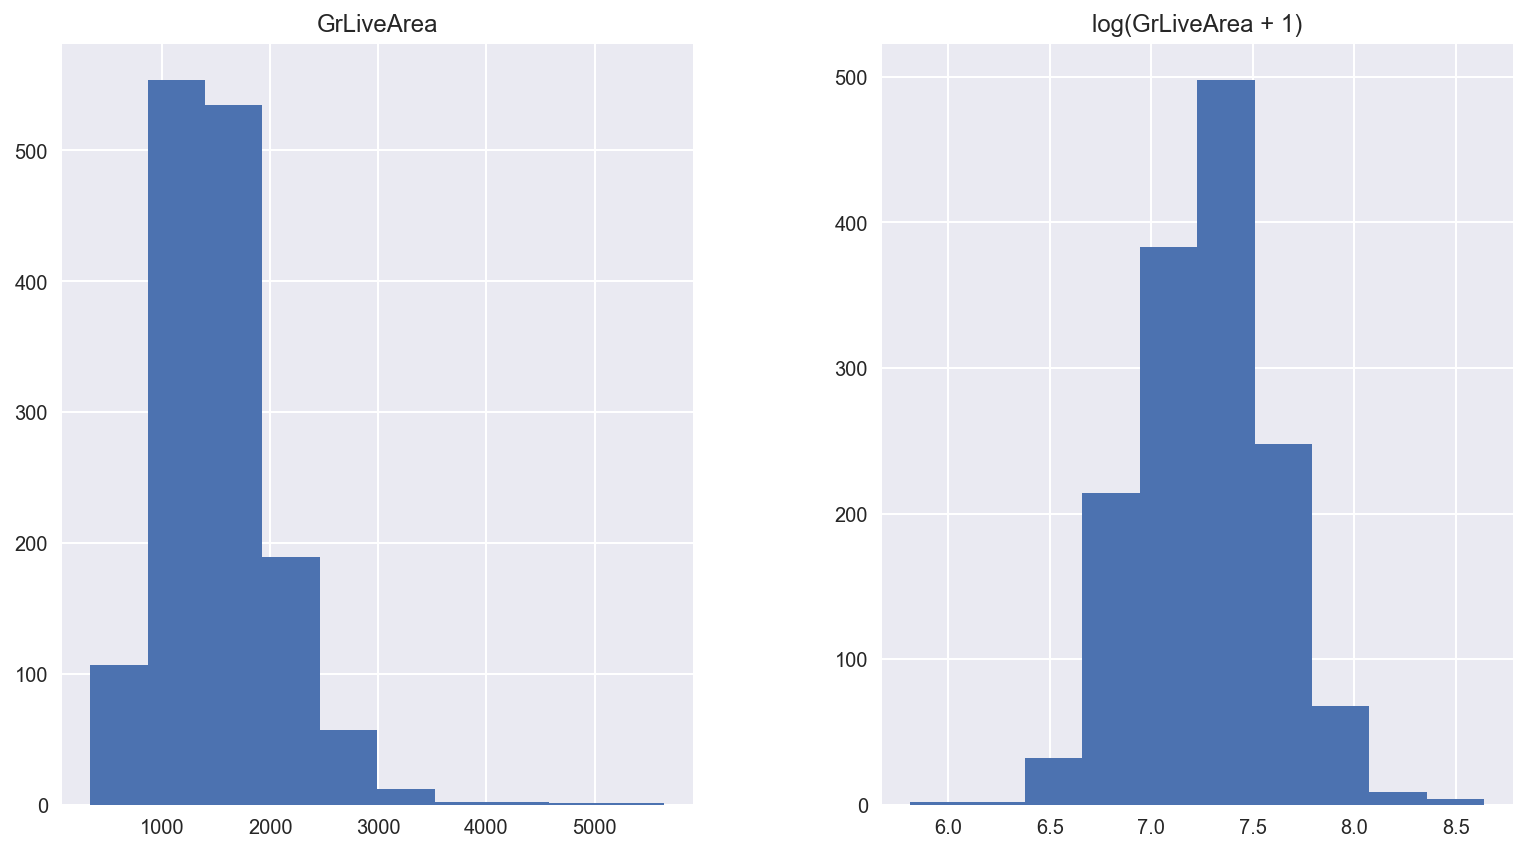

In [19]:
prices = pd.DataFrame({"GrLiveArea":train["GrLivArea"], "log(GrLiveArea + 1)":np.log1p(train["GrLivArea"])})
prices.hist(figsize=(13,7))

### Let's set up some data pipelines to perform the following:
1. DataFrameSelector: Select the columns for a particular data pipeline.
1. Impute numerical features with median.
1. Normalize the features.
1. Impute missing categories.
1. Transform categorical features into Binary Features.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
#Create a class that normalize the skewed data based on log(value +!)
class NormalizedDistFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.log1p(X)      

### Let's transform Qualitative variables into binary variables

### Let's define a custom imputer for N/A strings. 
### sklearn CategoricalEncoder does not handle null stings properly even with handle_unkown='ignore'
### This also has been reported as an issue:
https://github.com/scikit-learn/scikit-learn/issues/10465

In [22]:
def custom_categorical_imputer(qualitative, df):
    for f in qualitative:
        df[f]=df[f].fillna('Unk_' + f ).astype(str)
    return df

In [23]:
# Definition of the CategoricalEncoder class, copied from PR #9151.# Defini 
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [24]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [25]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(quantitative)),
    ('imputer', Imputer(strategy="median")),
    ('normalize', NormalizedDistFeature()),
])

In [26]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(qualitative)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense", handle_unknown='ignore')),
])

In [27]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [28]:
full = custom_categorical_imputer(qualitative,full)
full_prepared = full_pipeline.fit_transform(full)

In [29]:
from sklearn.model_selection import train_test_split
X = full_prepared[:train.shape[0]]
y = np.log1p(train.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Let's try simple linear regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
predictions=lr.predict(X_train)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
lin_mse = mean_squared_error(y_train,predictions)

In [36]:
lin_rmse = np.sqrt(lin_mse)

In [37]:
lin_rmse

0.08792024798168682

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(lr, X_train,y_train,scoring="neg_mean_squared_error", cv=10)

In [40]:
scores = np.sqrt(-scores)

In [41]:
scores

array([0.12375588, 0.17293166, 0.13842663, 0.21555336, 0.13650159,
       0.17357814, 0.12879966, 0.11802041, 0.15052531, 0.09496604])

In [42]:
X_test_kaggle = full_prepared[train.shape[0]:]

In [43]:
predictions = lr.predict(X_test_kaggle)

In [44]:
df_results = pd.DataFrame(np.exp(predictions)-1,columns=['SalePrice'], index=test.index)

In [45]:
pd.DataFrame.to_csv(df_results, path_or_buf='data/simple_linar.csv')

### Kaggle Score
.14034

### Let's try simple ridge regression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
lr_ridge = Ridge()

In [48]:
lr_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
scores = cross_val_score(lr_ridge, X_train,y_train,scoring="neg_mean_squared_error", cv=10)

In [50]:
scores = np.sqrt(-scores)

In [51]:
scores

array([0.12681795, 0.16173225, 0.13989711, 0.18954341, 0.15095639,
       0.11933123, 0.13046108, 0.11132485, 0.16382512, 0.09796953])

In [52]:
predictions = lr_ridge.predict(X_test_kaggle)

In [53]:
df_results = pd.DataFrame(np.exp(predictions)-1,columns=['SalePrice'], index=test.index)

In [54]:
pd.DataFrame.to_csv(df_results, path_or_buf='data/simple_ridge.csv')

### Kaggle Score
.13340

### Let's try Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso_reg = Lasso(alpha=.1)

In [57]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
predictions = lasso_reg.predict(X_test_kaggle)

In [59]:
df_results = pd.DataFrame(np.exp(predictions)-1,columns=['SalePrice'], index=test.index)

In [60]:
pd.DataFrame.to_csv(df_results, path_or_buf='data/simple_lasso.csv')

### Kaggle score 
.31655

### Let's try Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor()

In [63]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
predictions = rf.predict(X_test_kaggle)

In [65]:
df_results = pd.DataFrame(np.exp(predictions)-1,columns=['SalePrice'], index=test.index)

In [66]:
pd.DataFrame.to_csv(df_results, path_or_buf='data/simple_regressor.csv')

### Kaggle Score
.16398

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = [
    {'n_estimators': [3, 10, 30,40,50,60,70,80], 'max_features': [2, 4, 6, 8,10,30,40,50,60]},
    {'bootstrap': [False], 'n_estimators': [3, 10,30,40,50,80], 'max_features':[2, 3, 4,10,30,40,50,60]},
]

In [69]:
forest_reg = RandomForestRegressor()

In [70]:
gridsearch = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [71]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80], 'max_features': [2, 4, 6, 8, 10, 30, 40, 50, 60]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 50, 80], 'max_features': [2, 3, 4, 10, 30, 40, 50, 60]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [72]:
gridsearch.best_params_

{'bootstrap': False, 'max_features': 50, 'n_estimators': 50}

In [73]:
cvres = gridsearch.cv_results_

In [74]:
for mean_score, param in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), param)
    

0.23535451586427272 {'max_features': 2, 'n_estimators': 3}
0.19622487201627237 {'max_features': 2, 'n_estimators': 10}
0.18796141698466823 {'max_features': 2, 'n_estimators': 30}
0.18519460170608623 {'max_features': 2, 'n_estimators': 40}
0.18450607594984278 {'max_features': 2, 'n_estimators': 50}
0.18385594822112084 {'max_features': 2, 'n_estimators': 60}
0.18184560103916608 {'max_features': 2, 'n_estimators': 70}
0.18199084334543233 {'max_features': 2, 'n_estimators': 80}
0.22101058046286573 {'max_features': 4, 'n_estimators': 3}
0.1849501920673264 {'max_features': 4, 'n_estimators': 10}
0.17541662572647465 {'max_features': 4, 'n_estimators': 30}
0.17779055327840615 {'max_features': 4, 'n_estimators': 40}
0.17451231947131143 {'max_features': 4, 'n_estimators': 50}
0.1738895306011458 {'max_features': 4, 'n_estimators': 60}
0.1742803004081208 {'max_features': 4, 'n_estimators': 70}
0.17339404632715788 {'max_features': 4, 'n_estimators': 80}
0.21428197029578136 {'max_features': 6, 'n_es

In [75]:
predictions=gridsearch.predict(X_test_kaggle)

In [76]:
df_results = pd.DataFrame(np.exp(predictions)-1,columns=['SalePrice'], index=test.index)

In [78]:
pd.DataFrame.to_csv(df_results, path_or_buf='data/simple_grid_search_regressor.csv')

### Kaggle Score
.14826